In [1]:
%cd ../..

/home/dmoreno/ATAT_ZTF/elasticc_one


# Confusion matrices

In [2]:
import os
import json 
import torch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

/home/dmoreno/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [4]:
path_data = './data/datasets/ZTF_ff/final/LC_MD_FEAT_v3_windows_200_12_sampling'
path_results = './results/ZTF_ff/LC/lc_mta_v3_fixed_windows_200_sampling_tm/MTA'
time_to_eval = 2048

order_classes = ['SNIa', # yes
                 'SNIbc', # yes
                 'SNIIb', # yes
                 'SNII', # yes
                 'SNIIn', # yes
                 'SLSN', # yes
                 'TDE', # yes
                 'Microlensing', # yes
                 'QSO', 
                 'AGN', # yes
                 'Blazar', 
                 'YSO', 
                 'CV/Nova', 
                 'LPV', 
                 'EA', 
                 'EB/EW', # yes
                 'Periodic-Other', 
                 'RSCVn', 
                 'CEP', 
                 'RRLab', 
                 'RRLc', 
                 'DSCT']

In [5]:
code_dict = {
        0: "SNIa",
        1: "SNIbc",
        2: "SNIIb",
        3: "SNII",
        4: "SNIIn",
        5: "SLSN",
        6: "TDE",
        7: "Microlensing",
        8: "QSO",
        9: "AGN",
        10: "Blazar",
        11: "YSO",
        12: "CV/Nova",
        13: "LPV",
        14: "EA",
        15: "EB/EW",
        16: "Periodic-Other",
        17: "RSCVn",
        18: "CEP",
        19: "RRLab",
        20: "RRLc",
        21: "DSCT",
    }

code_dict_a = {
        0: "Transient",
        1: "Transient",
        2: "Transient",
        3: "Transient",
        4: "Transient",
        5: "Transient",
        6: "Transient",
        7: "Transient",
        8: "Stochastic",
        9: "Stochastic",
        10: "Stochastic",
        11: "Stochastic",
        12: "Stochastic",
        13: "Periodic",
        14: "Periodic",
        15: "Periodic",
        16: "Periodic",
        17: "Periodic",
        18: "Periodic",
        19: "Periodic",
        20: "Periodic",
        21: "Periodic",
    }

In [6]:
objects_partitions = pd.read_parquet('./data/datasets/ZTF_ff/partitions/v3/partitions.parquet')
obj_label = objects_partitions[objects_partitions['partition'] == 'test']
y_real_test = obj_label['alerceclass'].values
obj_label = ['aid_{}'.format(x) for x in obj_label['oid'].values]
obj_label

['aid_ZTF18adldhip',
 'aid_ZTF19aasbgeb',
 'aid_ZTF18aayfbqd',
 'aid_ZTF19ablyzbl',
 'aid_ZTF18actabfv',
 'aid_ZTF18aaztkvq',
 'aid_ZTF21aaphzsw',
 'aid_ZTF19aarhrcv',
 'aid_ZTF17aaajmxw',
 'aid_ZTF18acrvact',
 'aid_ZTF22aaahdyl',
 'aid_ZTF18aacebav',
 'aid_ZTF19abnqhwd',
 'aid_ZTF19abjgdow',
 'aid_ZTF18abklljv',
 'aid_ZTF18aalaphh',
 'aid_ZTF23aaaziou',
 'aid_ZTF17aacihzd',
 'aid_ZTF22abnmzar',
 'aid_ZTF17aaaoite',
 'aid_ZTF18abcurfb',
 'aid_ZTF18adbbyzu',
 'aid_ZTF18aaxpqts',
 'aid_ZTF18aacgwxk',
 'aid_ZTF18admcecv',
 'aid_ZTF18abukrnx',
 'aid_ZTF19aapuibt',
 'aid_ZTF18aawccep',
 'aid_ZTF21aahfpup',
 'aid_ZTF19aaoztzf',
 'aid_ZTF18aayijfg',
 'aid_ZTF18abgpcbj',
 'aid_ZTF18abwbiev',
 'aid_ZTF18actawil',
 'aid_ZTF20abyzomt',
 'aid_ZTF17aabxqbf',
 'aid_ZTF18abukymf',
 'aid_ZTF18abvbsoc',
 'aid_ZTF18actunfi',
 'aid_ZTF18aazfeau',
 'aid_ZTF22aaayewi',
 'aid_ZTF18aaxtcdl',
 'aid_ZTF18abtoxjw',
 'aid_ZTF18acdpxfb',
 'aid_ZTF18aabvmax',
 'aid_ZTF18abbogne',
 'aid_ZTF18aapnlus',
 'aid_ZTF18ab

In [7]:
y_real_test.shape

(8346,)

In [8]:
len(obj_label)

8346

In [9]:
import yaml

def load_yaml(path):
    with open(path, 'r') as file:
        args = yaml.load(file, Loader=yaml.FullLoader)
    return args

dict_info = load_yaml('{}/dict_info.yaml'.format(path_data))

mapping_classes = dict_info['mapping_classes']
mapping_classes_inverted = {v: k for k, v in mapping_classes.items()}
print(mapping_classes_inverted)

{0: 'AGN', 8: 'Blazar', 12: 'CEP', 5: 'CV/Nova', 15: 'DSCT', 2: 'EA', 10: 'EB/EW', 11: 'LPV', 21: 'Microlensing', 14: 'Periodic-Other', 1: 'QSO', 13: 'RRLab', 6: 'RRLc', 7: 'RSCVn', 17: 'SLSN', 9: 'SNII', 19: 'SNIIb', 20: 'SNIIn', 4: 'SNIa', 16: 'SNIbc', 18: 'TDE', 3: 'YSO'}


In [10]:
def sort_dict_by_value(d, reverse=False):
    return dict(sorted(d.items(), key=lambda x: x[1], reverse=reverse))

sort_classes = list(sort_dict_by_value(mapping_classes).keys())
print(sort_classes)

['AGN', 'QSO', 'EA', 'YSO', 'SNIa', 'CV/Nova', 'RRLc', 'RSCVn', 'Blazar', 'SNII', 'EB/EW', 'LPV', 'CEP', 'RRLab', 'Periodic-Other', 'DSCT', 'SNIbc', 'SLSN', 'TDE', 'SNIIb', 'SNIIn', 'Microlensing']


In [11]:
combined_dict = {}
for key, class_name in mapping_classes_inverted.items():
    # Buscar el código en code_dict
    for code, name in code_dict.items():
        if name == class_name:
            # Obtener el tipo de code_dict_a
            type_name = code_dict_a[code]
            # Agregar al nuevo diccionario con el nombre como llave
            combined_dict[class_name] = type_name
            break

combined_dict

{'AGN': 'Stochastic',
 'Blazar': 'Stochastic',
 'CEP': 'Periodic',
 'CV/Nova': 'Stochastic',
 'DSCT': 'Periodic',
 'EA': 'Periodic',
 'EB/EW': 'Periodic',
 'LPV': 'Periodic',
 'Microlensing': 'Transient',
 'Periodic-Other': 'Periodic',
 'QSO': 'Stochastic',
 'RRLab': 'Periodic',
 'RRLc': 'Periodic',
 'RSCVn': 'Periodic',
 'SLSN': 'Transient',
 'SNII': 'Transient',
 'SNIIb': 'Transient',
 'SNIIn': 'Transient',
 'SNIa': 'Transient',
 'SNIbc': 'Transient',
 'TDE': 'Transient',
 'YSO': 'Stochastic'}

In [28]:
predictions = torch.load('{}/all_predictions_times.pt'.format(path_results))
predictions

{'SNID': array([b'ZTF17aaaecgi_3', b'ZTF17aaaedvi_1', b'ZTF17aaafglk_0', ...,
        b'ZTF23aamxeoe_0', b'ZTF23aavxvsz_3', b'ZTF23abcvqkd_1'],
       dtype=object),
 'y_test': tensor([10, 11,  5,  ..., 20,  4,  4]),
 'list_y_pred': {'test_16': array([10, 11, 14, ...,  9,  3, 19]),
  'test_32': array([10, 11, 14, ...,  9,  3, 16]),
  'test_64': array([10, 11, 14, ...,  4,  3, 19]),
  'test_128': array([10, 11, 13, ..., 20,  3, 16]),
  'test_256': array([10, 11,  5, ..., 20,  3, 17]),
  'test_512': array([10, 11,  5, ..., 20,  3, 17]),
  'test_1024': array([10, 11,  5, ..., 20,  3, 17]),
  'test_2048': array([10, 11,  5, ..., 20,  3, 17])},
 'list_y_pred_prob': {'test_16': array([[1.97817662e-05, 6.34233766e-06, 1.32272884e-01, ...,
          6.10875622e-06, 4.27477261e-07, 2.74488775e-06],
         [3.06926122e-05, 3.75484888e-06, 1.95940374e-03, ...,
          1.02958784e-05, 8.91944921e-07, 2.54660736e-05],
         [5.39476946e-02, 1.64162181e-02, 3.00471205e-02, ...,
          5.86

In [29]:
# Procesamiento para agregar los índices correspondientes
from itertools import groupby

# Convertir bytes a str para facilitar la manipulación
snids_str = [snid.decode("utf-8") for snid in predictions['SNID']]

# Función para extraer el identificador base de cada SNID
def base_id(snid):
    return "_".join(snid.split("_")[:-1])

# Agrupar por el identificador base
grouped = groupby(range(len(snids_str)), key=lambda x: base_id(snids_str[x]))

# Crear la nueva clave con los índices agrupados
idx_windows_objects = [list(group) for _, group in grouped]

# Crear la clave 'idx_unique_y_test' con los índices del SNID 0 de todos los objetos
idx_unique_y_test = []
ids_unique_real = []

first_of_each_window = {}
for i, snid in enumerate(snids_str):
    obj_str = snid.split('_')[0]  # Extraer el tipo de ventana, que es el número después del '_'
    
    if obj_str not in first_of_each_window:
        idx_unique_y_test.append(i)
        ids_unique_real.append('aid_{}'.format(snid.split('_')[0]))
        first_of_each_window[obj_str] = i

# Mostrar el resultado
print('length: ', len(idx_windows_objects))
print('length: ', len(idx_unique_y_test))

length:  41728
length:  41728


In [30]:
print(ids_unique_real)
print(len(ids_unique_real))

['aid_ZTF17aaaecgi', 'aid_ZTF17aaaedvi', 'aid_ZTF17aaafglk', 'aid_ZTF17aaafiut', 'aid_ZTF17aaafiww', 'aid_ZTF17aaafyis', 'aid_ZTF17aaafyxs', 'aid_ZTF17aaagryq', 'aid_ZTF17aaaidzt', 'aid_ZTF17aaaizfv', 'aid_ZTF17aaakbvl', 'aid_ZTF17aaaorgv', 'aid_ZTF17aaaowhs', 'aid_ZTF17aaaqtul', 'aid_ZTF17aaarxab', 'aid_ZTF17aaarxbz', 'aid_ZTF17aaarzye', 'aid_ZTF17aaasboc', 'aid_ZTF17aaasklh', 'aid_ZTF17aaatgma', 'aid_ZTF17aaatkxt', 'aid_ZTF17aaatlhi', 'aid_ZTF17aaauijj', 'aid_ZTF17aaaweng', 'aid_ZTF17aaawqzp', 'aid_ZTF17aabhlnm', 'aid_ZTF17aabooqt', 'aid_ZTF17aabootn', 'aid_ZTF17aabopzp', 'aid_ZTF17aaboqfs', 'aid_ZTF17aabppsz', 'aid_ZTF17aabppwh', 'aid_ZTF17aabqidu', 'aid_ZTF17aabummz', 'aid_ZTF17aabupde', 'aid_ZTF17aabuphg', 'aid_ZTF17aabuuyx', 'aid_ZTF17aabuvjm', 'aid_ZTF17aabvgfc', 'aid_ZTF17aabviic', 'aid_ZTF17aabxamk', 'aid_ZTF17aabxkhe', 'aid_ZTF17aacgwpq', 'aid_ZTF17aackses', 'aid_ZTF17aactvce', 'aid_ZTF17aadgwyo', 'aid_ZTF17aadidmw', 'aid_ZTF17aadjkhd', 'aid_ZTF17aadooax', 'aid_ZTF18aaaajiw',

In [31]:
# Calcular el promedio de las probabilidades para cada conjunto de ventanas

predictions.update({
    'list_y_pred_prob_avg': dict(),
    'list_y_pred_avg': dict(),
    })

for eval_time, predicciones in predictions['list_y_pred_prob'].items():
    predictions['list_y_pred_prob_avg'][eval_time] = [] 
    predictions['list_y_pred_avg'][eval_time] = [] 
    for idx_windows in idx_windows_objects:
        window_probs = predicciones[idx_windows]
        avg_probs = np.mean(window_probs, axis=0)
        predictions['list_y_pred_prob_avg'][eval_time].append(avg_probs)
        predictions['list_y_pred_avg'][eval_time].append(np.argmax(avg_probs, axis=0))

    predictions['list_y_pred_prob_avg'][eval_time] = np.array(predictions['list_y_pred_prob_avg'][eval_time])
    predictions['list_y_pred_avg'][eval_time] = np.array(predictions['list_y_pred_avg'][eval_time])

predictions['list_y_pred_avg']

{'test_16': array([10, 11, 14, ...,  9,  3, 19]),
 'test_32': array([10, 11, 14, ...,  9,  3, 16]),
 'test_64': array([10, 11, 14, ...,  4,  3, 19]),
 'test_128': array([10, 11, 13, ..., 20,  3, 16]),
 'test_256': array([10, 11,  5, ..., 20,  3, 17]),
 'test_512': array([10, 11,  5, ..., 20,  3, 17]),
 'test_1024': array([10, 11,  5, ..., 20,  3, 17]),
 'test_2048': array([10, 11,  5, ..., 20,  3, 17])}

In [32]:
predictions['list_y_pred_avg']['test_2048'].shape

(41728,)

In [33]:
predictions.keys()

dict_keys(['SNID', 'y_test', 'list_y_pred', 'list_y_pred_prob', 'list_y_pred_prob_avg', 'list_y_pred_avg'])

In [34]:
predictions['y_test'].shape

torch.Size([86478])

In [35]:
predictions['SNID'].shape

(86478,)

In [36]:
print(idx_unique_y_test)

[0, 1, 2, 3, 4, 5, 6, 7, 10, 15, 16, 17, 23, 24, 25, 30, 31, 32, 38, 39, 43, 44, 45, 50, 61, 62, 63, 72, 84, 85, 86, 87, 88, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 119, 126, 135, 136, 143, 144, 145, 146, 153, 154, 155, 162, 163, 164, 165, 166, 167, 177, 178, 179, 180, 181, 185, 186, 187, 188, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 224, 225, 226, 227, 228, 238, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 278, 279, 280, 281, 282, 290, 291, 292, 293, 294, 306, 307, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 339, 340, 341, 349, 353, 354, 355, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 379, 380, 381, 385, 386, 387, 388, 389, 390, 391, 400, 401, 402, 403, 404, 405, 406, 414, 415, 416, 417, 418, 419, 429, 430, 431, 439, 440, 441, 442, 450, 451, 452, 453, 460, 468, 469, 470, 471, 472, 479,

In [37]:
print(ids_unique_real)

['aid_ZTF17aaaecgi', 'aid_ZTF17aaaedvi', 'aid_ZTF17aaafglk', 'aid_ZTF17aaafiut', 'aid_ZTF17aaafiww', 'aid_ZTF17aaafyis', 'aid_ZTF17aaafyxs', 'aid_ZTF17aaagryq', 'aid_ZTF17aaaidzt', 'aid_ZTF17aaaizfv', 'aid_ZTF17aaakbvl', 'aid_ZTF17aaaorgv', 'aid_ZTF17aaaowhs', 'aid_ZTF17aaaqtul', 'aid_ZTF17aaarxab', 'aid_ZTF17aaarxbz', 'aid_ZTF17aaarzye', 'aid_ZTF17aaasboc', 'aid_ZTF17aaasklh', 'aid_ZTF17aaatgma', 'aid_ZTF17aaatkxt', 'aid_ZTF17aaatlhi', 'aid_ZTF17aaauijj', 'aid_ZTF17aaaweng', 'aid_ZTF17aaawqzp', 'aid_ZTF17aabhlnm', 'aid_ZTF17aabooqt', 'aid_ZTF17aabootn', 'aid_ZTF17aabopzp', 'aid_ZTF17aaboqfs', 'aid_ZTF17aabppsz', 'aid_ZTF17aabppwh', 'aid_ZTF17aabqidu', 'aid_ZTF17aabummz', 'aid_ZTF17aabupde', 'aid_ZTF17aabuphg', 'aid_ZTF17aabuuyx', 'aid_ZTF17aabuvjm', 'aid_ZTF17aabvgfc', 'aid_ZTF17aabviic', 'aid_ZTF17aabxamk', 'aid_ZTF17aabxkhe', 'aid_ZTF17aacgwpq', 'aid_ZTF17aackses', 'aid_ZTF17aactvce', 'aid_ZTF17aadgwyo', 'aid_ZTF17aadidmw', 'aid_ZTF17aadjkhd', 'aid_ZTF17aadooax', 'aid_ZTF18aaaajiw',

In [38]:
predictions['labels_final'] = predictions['y_test'][idx_unique_y_test]
predictions['ids_final'] = np.array(ids_unique_real)
print(predictions['labels_final'].shape)

df_atat_pred = []

for eval_time, prob_classes in predictions['list_y_pred_prob_avg'].items():
    df = pd.DataFrame(prob_classes, columns=sort_classes)
    df['shorten'] = str(eval_time.split('_')[-1])
    df.index = predictions['ids_final']
    df_atat_pred.append(df)

df_atat_pred = pd.concat(df_atat_pred)
df_atat_pred

torch.Size([41728])


,AGN,QSO,EA,YSO,SNIa,CV/Nova,RRLc,RSCVn,Blazar,SNII,...,RRLab,Periodic-Other,DSCT,SNIbc,SLSN,TDE,SNIIb,SNIIn,Microlensing,shorten
aid_ZTF17aaaecgi,0.000020,0.000006,0.132273,0.000659,0.000007,0.000361,0.005468,0.021975,0.000025,0.000014,...,0.000171,0.000043,0.000898,0.000011,5.935418e-08,4.532368e-07,6.108756e-06,4.274773e-07,2.744888e-06,16
aid_ZTF17aaaedvi,0.000031,0.000004,0.001959,0.002718,0.000084,0.000018,0.000015,0.001361,0.000010,0.000025,...,0.000025,0.000043,0.000031,0.000009,1.951196e-05,9.242376e-08,1.029588e-05,8.919449e-07,2.546607e-05,16
aid_ZTF17aaafglk,0.053948,0.016416,0.030047,0.032327,0.042562,0.077928,0.076223,0.098451,0.039415,0.057577,...,0.053313,0.183435,0.046245,0.011107,3.989674e-03,1.535900e-02,5.864548e-03,7.630874e-03,4.495207e-05,16
aid_ZTF17aaafiut,0.000010,0.000009,0.976115,0.000948,0.000005,0.000069,0.000125,0.000645,0.000004,0.000004,...,0.000021,0.000060,0.000087,0.000001,3.486952e-08,2.697599e-08,5.647524e-08,2.026252e-07,1.521880e-06,16
aid_ZTF17aaafiww,0.001681,0.000113,0.019427,0.070100,0.000242,0.018812,0.058884,0.246391,0.003078,0.000098,...,0.036318,0.201466,0.075881,0.000028,1.936795e-06,1.503452e-06,7.759728e-06,4.372720e-05,1.076895e-07,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aid_ZTF23aamapva,0.002204,0.000071,0.001769,0.032568,0.000033,0.001824,0.000938,0.108029,0.000322,0.000018,...,0.000765,0.815863,0.021801,0.000007,1.582235e-07,2.479889e-05,8.400904e-08,8.462434e-06,3.292515e-08,2048
aid_ZTF23aamsarj,0.005432,0.004872,0.011314,0.065537,0.123635,0.079855,0.000081,0.008637,0.006242,0.295431,...,0.001073,0.000032,0.000199,0.088338,2.518840e-04,2.784833e-04,2.679936e-01,3.323440e-02,8.265939e-04,2048
aid_ZTF23aamxeoe,0.000591,0.000635,0.000019,0.000021,0.055234,0.025012,0.000004,0.000005,0.000039,0.080573,...,0.000005,0.000094,0.000054,0.065393,1.018046e-04,8.105925e-03,1.694060e-04,7.639180e-01,2.776728e-10,2048
aid_ZTF23aavxvsz,0.004655,0.000764,0.001195,0.507579,0.196771,0.052937,0.001105,0.009928,0.016911,0.019498,...,0.004306,0.000446,0.000415,0.109737,2.565873e-04,8.001748e-05,2.927021e-04,5.966640e-04,3.086121e-08,2048


In [39]:
atat_pred_2048_time_test = df_atat_pred[df_atat_pred['shorten'] == '2048']
atat_pred_2048_time_test = atat_pred_2048_time_test.reindex(obj_label)[sort_classes]
atat_pred_2048_time_test

,AGN,QSO,EA,YSO,SNIa,CV/Nova,RRLc,RSCVn,Blazar,SNII,...,CEP,RRLab,Periodic-Other,DSCT,SNIbc,SLSN,TDE,SNIIb,SNIIn,Microlensing
aid_ZTF18adldhip,0.471236,0.192811,0.012194,0.002074,0.006537,0.021444,0.014071,0.039929,0.103119,0.002908,...,0.001320,0.001300,0.100286,0.003213,8.795266e-04,3.130854e-03,7.083993e-03,2.841617e-05,0.006027,6.359010e-07
aid_ZTF19aasbgeb,0.284231,0.453618,0.000069,0.000044,0.017182,0.003391,0.000115,0.000248,0.140490,0.049244,...,0.000160,0.000051,0.000043,0.000022,2.185001e-02,1.611974e-02,2.069631e-05,9.260081e-05,0.012937,3.708776e-07
aid_ZTF18aayfbqd,0.000115,0.000052,0.449654,0.048572,0.000248,0.000344,0.000167,0.000568,0.000116,0.000261,...,0.068379,0.000224,0.000317,0.000088,4.074819e-05,4.356026e-06,1.782848e-06,3.266025e-08,0.000011,1.017915e-05
aid_ZTF19ablyzbl,0.308770,0.246945,0.003839,0.003145,0.059376,0.021523,0.009527,0.016923,0.194846,0.012634,...,0.000809,0.001599,0.001933,0.000566,1.584703e-02,6.739560e-02,1.683010e-03,2.606753e-02,0.001493,3.118618e-04
aid_ZTF18actabfv,0.001426,0.000196,0.016786,0.862255,0.006387,0.001737,0.000105,0.018438,0.000088,0.000193,...,0.006690,0.000148,0.052738,0.000944,3.617389e-03,1.841326e-06,1.489468e-04,6.228418e-07,0.000792,5.531572e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aid_ZTF18abdlmwe,0.000654,0.000085,0.080350,0.169111,0.000148,0.001215,0.003546,0.020335,0.000112,0.000039,...,0.663297,0.002220,0.010573,0.001351,4.038168e-05,7.261020e-07,1.227504e-05,1.277534e-07,0.000011,3.929720e-06
aid_ZTF18abnueof,0.000028,0.000020,0.000030,0.000044,0.000002,0.001439,0.314721,0.001861,0.000007,0.000005,...,0.031439,0.159641,0.011809,0.478677,8.505005e-07,1.451971e-07,1.907504e-06,1.860454e-06,0.000001,2.505019e-07
aid_ZTF17aaagvih,0.000620,0.000242,0.139618,0.037099,0.001894,0.074726,0.004541,0.038581,0.006369,0.002168,...,0.210054,0.003806,0.023415,0.005408,2.458247e-03,1.643822e-06,4.626368e-06,1.460876e-06,0.000294,1.043784e-05
aid_ZTF17aabpjme,0.000453,0.000079,0.000107,0.011749,0.000109,0.019128,0.015542,0.042369,0.007876,0.000047,...,0.160582,0.691640,0.002423,0.045724,3.005085e-05,3.394485e-06,4.719080e-07,5.898031e-04,0.000005,5.375781e-06


In [40]:
atat_pred_2048_time_test

,AGN,QSO,EA,YSO,SNIa,CV/Nova,RRLc,RSCVn,Blazar,SNII,...,CEP,RRLab,Periodic-Other,DSCT,SNIbc,SLSN,TDE,SNIIb,SNIIn,Microlensing
aid_ZTF18adldhip,0.471236,0.192811,0.012194,0.002074,0.006537,0.021444,0.014071,0.039929,0.103119,0.002908,...,0.001320,0.001300,0.100286,0.003213,8.795266e-04,3.130854e-03,7.083993e-03,2.841617e-05,0.006027,6.359010e-07
aid_ZTF19aasbgeb,0.284231,0.453618,0.000069,0.000044,0.017182,0.003391,0.000115,0.000248,0.140490,0.049244,...,0.000160,0.000051,0.000043,0.000022,2.185001e-02,1.611974e-02,2.069631e-05,9.260081e-05,0.012937,3.708776e-07
aid_ZTF18aayfbqd,0.000115,0.000052,0.449654,0.048572,0.000248,0.000344,0.000167,0.000568,0.000116,0.000261,...,0.068379,0.000224,0.000317,0.000088,4.074819e-05,4.356026e-06,1.782848e-06,3.266025e-08,0.000011,1.017915e-05
aid_ZTF19ablyzbl,0.308770,0.246945,0.003839,0.003145,0.059376,0.021523,0.009527,0.016923,0.194846,0.012634,...,0.000809,0.001599,0.001933,0.000566,1.584703e-02,6.739560e-02,1.683010e-03,2.606753e-02,0.001493,3.118618e-04
aid_ZTF18actabfv,0.001426,0.000196,0.016786,0.862255,0.006387,0.001737,0.000105,0.018438,0.000088,0.000193,...,0.006690,0.000148,0.052738,0.000944,3.617389e-03,1.841326e-06,1.489468e-04,6.228418e-07,0.000792,5.531572e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aid_ZTF18abdlmwe,0.000654,0.000085,0.080350,0.169111,0.000148,0.001215,0.003546,0.020335,0.000112,0.000039,...,0.663297,0.002220,0.010573,0.001351,4.038168e-05,7.261020e-07,1.227504e-05,1.277534e-07,0.000011,3.929720e-06
aid_ZTF18abnueof,0.000028,0.000020,0.000030,0.000044,0.000002,0.001439,0.314721,0.001861,0.000007,0.000005,...,0.031439,0.159641,0.011809,0.478677,8.505005e-07,1.451971e-07,1.907504e-06,1.860454e-06,0.000001,2.505019e-07
aid_ZTF17aaagvih,0.000620,0.000242,0.139618,0.037099,0.001894,0.074726,0.004541,0.038581,0.006369,0.002168,...,0.210054,0.003806,0.023415,0.005408,2.458247e-03,1.643822e-06,4.626368e-06,1.460876e-06,0.000294,1.043784e-05
aid_ZTF17aabpjme,0.000453,0.000079,0.000107,0.011749,0.000109,0.019128,0.015542,0.042369,0.007876,0.000047,...,0.160582,0.691640,0.002423,0.045724,3.005085e-05,3.394485e-06,4.719080e-07,5.898031e-04,0.000005,5.375781e-06


In [41]:
y_pred_test = atat_pred_2048_time_test.idxmax(axis=1).values
y_pred_test

array(['AGN', 'QSO', 'EA', ..., 'LPV', 'RRLab', 'YSO'], dtype=object)

In [42]:
y_real_test

array(['AGN', 'QSO', 'EA', ..., 'YSO', 'RRLab', 'YSO'], dtype=object)

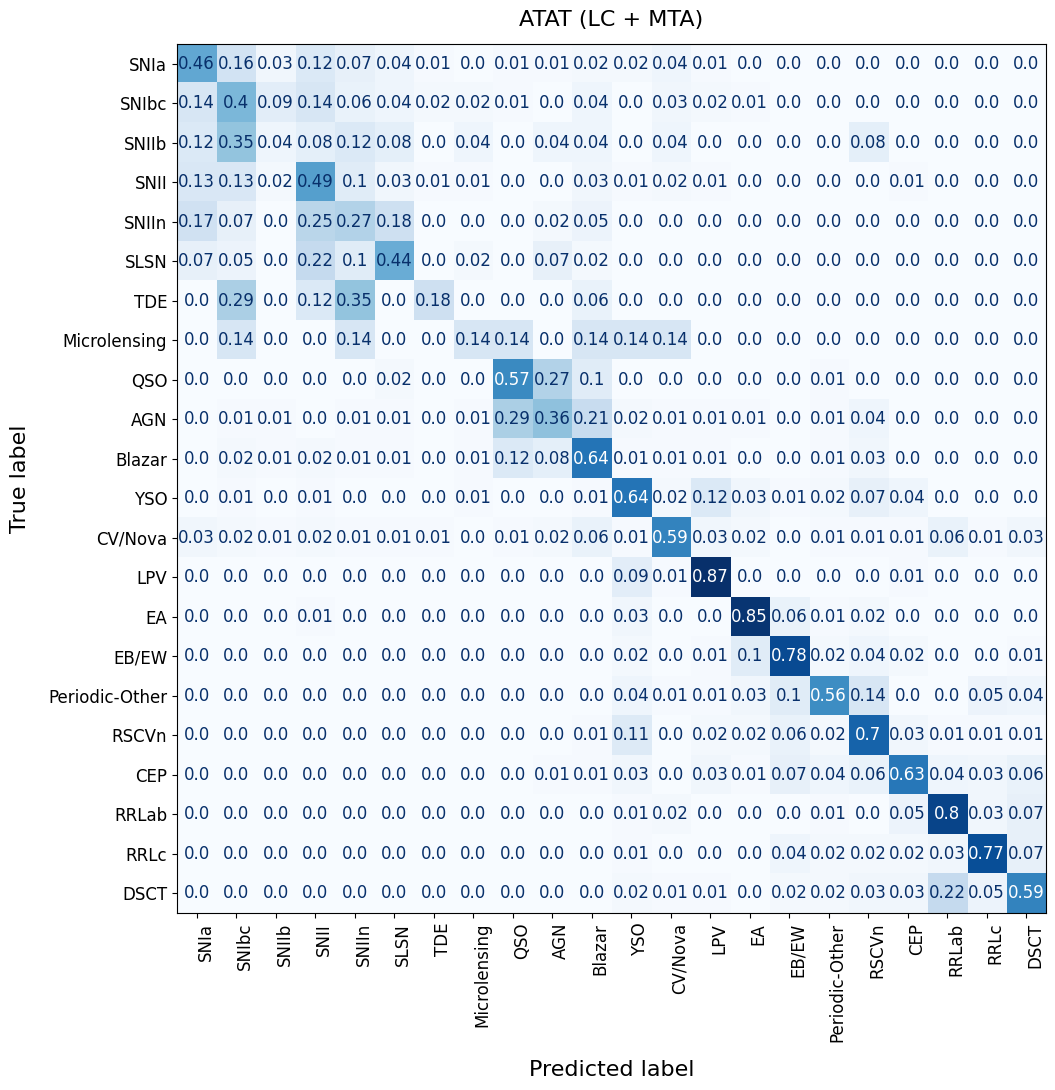

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

fs = 12

cm = confusion_matrix(y_true=y_real_test, y_pred=y_pred_test, labels=order_classes, normalize='true')

cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(11, 11)) #, dpi=110)
im = ax.imshow(np.around(cm, decimals=2), interpolation='nearest', cmap=cmap)

# color map
new_color = cmap(1.0) 

# Añadiendo manualmente las anotaciones con la media y desviación estándar
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] >= 0.005:
            #print(cm[i, j])
            text = f'{np.around(cm[i, j], decimals=2)}'
            color = "white" if cm[i, j] > 0.5 else new_color  # Blanco para la diagonal, tono de azul para otras celdas
            ax.text(j, i, text, ha="center", va="center", color=color, fontsize=fs)
        else:
            text = f'{np.around(cm[i, j], decimals=2)}'
            color = "white" if cm[i, j] > 0.5 else new_color  # Blanco para la diagonal, tono de azul para otras celdas
            ax.text(j, i, text, ha="center", va="center", color=color, fontsize=fs)

# Ajustes finales y mostrar la gráfica
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticks(np.arange(len(order_classes)))
ax.set_yticks(np.arange(len(order_classes)))
ax.set_xticklabels(order_classes)
ax.set_yticklabels(order_classes)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

ax.set_title('ATAT (LC + MTA)', fontsize=16, pad=13)
ax.set_xlabel('Predicted label', fontsize=16, labelpad=13)  # Label del eje x
ax.set_ylabel('True label', fontsize=16, labelpad=13)        # Label del eje y

ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.xaxis.labelpad = 13
ax.yaxis.labelpad = 13

plt.tight_layout()
plt.show()

In [44]:
from sklearn.metrics import f1_score

f1_score(y_real_test, y_pred_test, average='macro')

0.514628566817453